In [1]:
import logging
import json
import operator
import codecs
import itertools

import matplotlib.pyplot as plt

from tqdm import tqdm
from argParseDummy import args
from pathlib import Path

In [2]:
args()

logging.basicConfig(level=logging.INFO, format='%(asctime)s %(levelname)s %(message)s')
logger = logging.getLogger(__name__)

In [3]:
#loads the json dump from vocab creation
def loadVocabDumpSort():
    word_freqs_str = Path("savedDataAndModels/wordFreqs.json").read_text()
    word_freqs_dict = json.loads(word_freqs_str)
    sorted_word_freqs = sorted(word_freqs_dict.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_word_freqs

def summedFreqs(swf):
    acc=0
    return [acc:=acc+x for _,x in swf]

#calculate the number of total words, unique words and other stuff
def printVocabStats(sorted_word_freqs,sum_freq, ns=[args.vocab_size]):
    print("unique words: ", len(sorted_word_freqs))
    print("total words: ", sum_freq[-1])
    for n in ns:
        print()
        print("top ", n, " total words: ", sum_freq[n])
        print(100 * sum_freq[n] / sum_freq[-1], "% of total words")
        print(100 * n / len(sorted_word_freqs), "% of unique words")
        print(n,"s word", sorted_word_freqs[n])
        

In [4]:
sort_wf = loadVocabDumpSort()
sum_wf = summedFreqs(sort_wf)
sum_percent = list(map(lambda x: 100*x/sum_wf[-1], sum_wf))
printVocabStats(sort_wf, sum_wf, [10000,25000,50000,75000,100000, 150000])

unique words:  1400093
total words:  238582456

top  10000  total words:  214015914
89.70312301588513 % of total words
0.714238268457881 % of unique words
10000 s word ('isotope', 1933)

top  25000  total words:  226653582
95.00010428260492 % of total words
1.7855956711447025 % of unique words
25000 s word ('dpcr', 371)

top  50000  total words:  231516728
97.03845449558118 % of total words
3.571191342289405 % of unique words
50000 s word ('dwivedi', 105)

top  75000  total words:  233353145
97.80817454574279 % of total words
5.356787013434108 % of unique words
75000 s word ('βgal', 52)

top  100000  total words:  234363342
98.23159084253874 % of total words
7.14238268457881 % of unique words
100000 s word ('nemenyi', 32)

top  150000  total words:  235483175
98.70096022483732 % of total words
10.713574026868216 % of unique words
150000 s word ('tnnc1', 16)


In [5]:
#clac extOth and extr min_cnt 5 coverage
vocab_strs = [args.extOthVocab_path.read_text("utf-8"), args.extrVocab_path.read_text("utf-8")]

def strLst2NumLst(strLst):
    return list(map(int, strLst.split()[1:-1:2]))

#not above but geq
sumAboveX = lambda lst, x: sum(itertools.takewhile(lambda y:y >=x,lst))

occLists = list(map(strLst2NumLst, vocab_strs))

totalWords = list(map(sum, occLists))
uniqueWords = list(map(lambda x: len(x)-3, occLists))

def printPercCovMinFreq(occLst, end):
    tW = sum(occLst)
    print("total Words: ", tW)
    for x in range(1,end):
        perAX = sumAboveX(occLst[3:], x)/tW*100
        print("percentage geq",x,":",perAX)


In [6]:
printPercCovMinFreq(occLists[0],6)

total Words:  1467484
percentage geq 1 : 100.0
percentage geq 2 : 98.90710903832682
percentage geq 3 : 97.9228393631549
percentage geq 4 : 97.14661284211617
percentage geq 5 : 96.41611084005004


In [7]:
printPercCovMinFreq(occLists[1],6)

total Words:  82967
percentage geq 1 : 100.0
percentage geq 2 : 97.23504525895838
percentage geq 3 : 94.120553955187
percentage geq 4 : 91.42309592970699
percentage geq 5 : 88.94018103583352


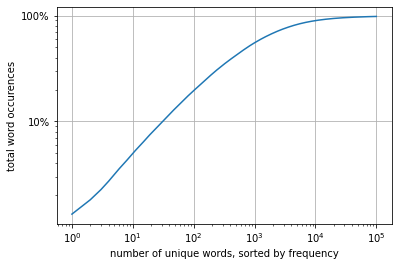

In [8]:
xmin = 1
xmax = 100000
plt.plot(range(xmin, xmax), sum_percent[xmin:xmax])
plt.xlabel("number of unique words, sorted by frequency")
plt.ylabel("total word occurences")
plt.yscale("log")
plt.xscale("log")
plt.yticks([10,100], ["10%","100%"])
plt.grid(True)
plt.savefig(Path("plots/WFLogLog_100k.pdf"))

In [9]:
def getSentenceLengths(source = args.pre_path, args = args):
    fin = codecs.open(Path(source), 'r', 'utf-8')
    length_freqs={}
    for line in tqdm(fin):
        words = line.strip().split()
        if not len(words):
            continue
        try:
            length_freqs[len(words)] +=1
        except:
            length_freqs[len(words)] =1
    return length_freqs

def countLines(source):
    cnt = 0
    for line in codecs.open(source, 'r', 'utf-8'):
        cnt += 1
    return cnt

In [10]:
cordLenDict = getSentenceLengths(source = args.pre_path)
print("# Sentences: ", sum(cordLenDict.values()))
sorted(cordLenDict.items())

24557956it [01:03, 389246.04it/s]


KeyboardInterrupt: 

In [ ]:
extOthLenDict = getSentenceLengths(source = args.extOthProcessed_path)
print("# Sentences: ", sum(extOthLenDict.values()))
sorted(extOthLenDict.items())

In [ ]:
extrLenDict = getSentenceLengths(source = args.extractedProcessed_path)
print("# Sentences: ", sum(extrLenDict.values()))
sorted(extrLenDict.items())

In [ ]:
#line counts
preLines = countLines(args.pre_path)
print(preLines)
filtLines = countLines(args.filtered_path)
print(filtLines)
print("language filtering filtered about {:.2f}% calced by line count".format(100* filtLines/(preLines+filtLines)))

In [10]:
lens = getSentenceLengths()
sLens = sorted(lens.items(), key=operator.itemgetter(0))
x, y = map(list,zip(*sLens))
len_sum = summedFreqs(sLens)
len_percent = list(map(lambda x: 100*x/len_sum[-1], len_sum))

32282582it [01:25, 379144.38it/s]


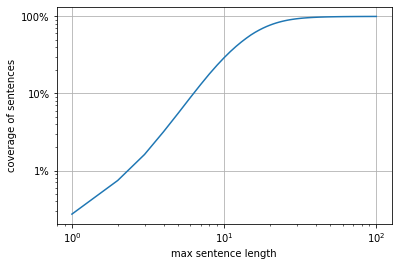

In [11]:
plt.plot(x[0:100],len_percent[0:100])
plt.xlabel("max sentence length")
plt.ylabel("coverage of sentences")
plt.yscale("log")
plt.xscale("log")
plt.grid(True)
plt.yticks([1, 10,100], ["1%", "10%","100%"])
plt.savefig(Path("plots/LenPercLogLog_100.pdf"))

In [ ]:
def printMaxlenStats(len_percent,x,y, maxlen_list = [50,60,70,80]):
    print("total sentences:", len_sum[-1])
    for maxlen in maxlen_list:
        print("The {}s shortest length is {}".format(maxlen, x[maxlen]))
        print("{} sentences are this long".format(y[maxlen]))
        print("{}% of sentences are smaller or eqal this length".format(len_percent[maxlen]))
        print()

In [ ]:
printMaxlenStats(len_percent,x,y)